In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test_df.shape

(1459, 80)

In [9]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

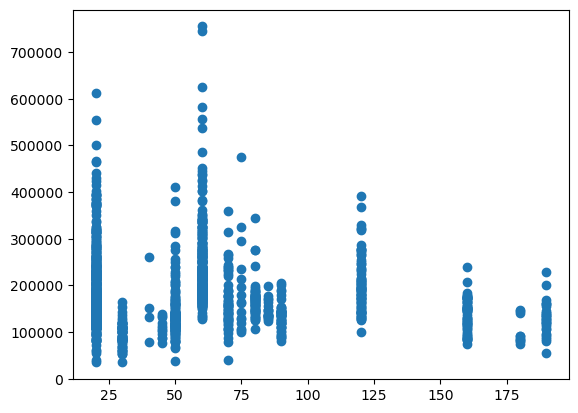

In [13]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)

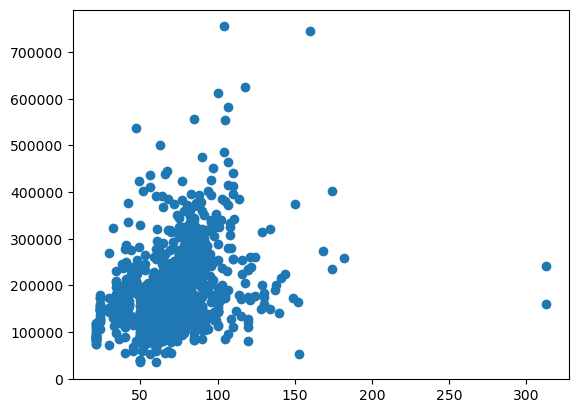

In [14]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

In [15]:
train_df.query('LotFrontage > 300')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [16]:
train_df.query('LotArea > 55000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [21]:
train_df.query('OverallQual == 10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [23]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [25]:
train_df = train_df[train_df.Id.isin(values) == False]

In [27]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
MasVnrType,861
FireplaceQu,684
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76


In [29]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [31]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [33]:
train_df['Alley'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2277165759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2277165759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [35]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [37]:
train_df['Fence'].fillna('No', inplace=True)
test_df['Fence'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3730986352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3730986352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [39]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [41]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2175816292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2175816292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [43]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [45]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [47]:
train_df['FireplaceQu'].fillna('No', inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2825947256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2825947256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [49]:
train_df['LotFrontage'].fillna(0, inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\1334701034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0, inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\1334701034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [51]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

0.8289827595060579

In [53]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [55]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\1255948083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\1255948083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [57]:
train_df['GarageType'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3721453499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3721453499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [59]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2912414829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2912414829.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [61]:
train_df['GarageQual'].fillna('No', inplace=True)
test_df['GarageQual'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\94532614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\94532614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [63]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [65]:
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
test_df['BsmtFinType2'].fillna('Unf', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\1071294587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\1071294587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [67]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [69]:
train_df['BsmtExposure'].fillna('No', inplace=True)
test_df['BsmtExposure'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2040818772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2040818772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [71]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [73]:
train_df['BsmtQual'].fillna('No', inplace=True)
test_df['BsmtQual'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2878576625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2878576625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [75]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [77]:
train_df['BsmtCond'].fillna('No', inplace=True)
test_df['BsmtCond'].fillna('No', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2806626140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\2806626140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [79]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [81]:
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
test_df['BsmtFinType1'].fillna('Unf', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3531540711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3531540711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [83]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [85]:
train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

C:\Users\sandu\AppData\Local\Temp\ipykernel_316\4245203846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr', inplace=True)
C:\Users\sandu\AppData\Local\Temp\ipykernel_316\4245203846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [87]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [89]:
#feature engineering

In [91]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [93]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [95]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [97]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [99]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [101]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [103]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

In [105]:
train_df.shape

(1439, 61)

In [107]:
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

In [109]:
# train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [111]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [113]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [115]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [117]:
# Drop SalePrice to get features (X) and target (y)
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# 1. Preprocess Numeric Columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
# num_cols = num_cols.drop('SalePrice')  # This line is not needed and causes the error.

# Step 1: Impute missing values with mean
num_imputer = SimpleImputer(strategy='mean')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Step 2: Scale the numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 2. Preprocess Ordinal Columns
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope', 'BsmtQual', 'BsmtFinType1', 'CentralAir', 'Functional',
            'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual',
            'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

# Step 1: Impute missing values with the most frequent value
ode_imputer = SimpleImputer(strategy='most_frequent')
X[ode_cols] = ode_imputer.fit_transform(X[ode_cols])

# Step 2: Encode ordinal columns with OrdinalEncoder
ode_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[ode_cols] = ode_encoder.fit_transform(X[ode_cols])

# 3. Preprocess One-Hot Encoded Columns
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
            'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation', 'Electrical', 'SaleType', 'MSZoning',
            'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

# Step 1: Impute missing values with the most frequent value
ohe_imputer = SimpleImputer(strategy='most_frequent')
X[ohe_cols] = ohe_imputer.fit_transform(X[ohe_cols])

# Step 2: Apply OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_encoded = pd.DataFrame(ohe_encoder.fit_transform(X[ohe_cols]),
                           columns=ohe_encoder.get_feature_names_out(ohe_cols))

# Drop the original one-hot encoded columns from X
X = X.drop(columns=ohe_cols)

# Concatenate the one-hot encoded columns with the original DataFrame
X_preprocessed = pd.concat([X.reset_index(drop=True), ohe_encoded.reset_index(drop=True)], axis=1)


In [119]:
# List of columns to be dropped
columns_to_drop = ['MasVnrType_BrkFace', 'GarageType_BuiltIn', 'BsmtUnfSF', 'RoofStyle_Hip',
                   'Neighborhood_StoneBr', 'LotFrontage', 'Neighborhood_Somerst', 'ExterCond', 'LotConfig_CulDSac',
                   'Heating_GasA', 'Neighborhood_Timber', 'BldgType_1Fam', 'Functional', 'MSZoning_FV',
                   'Neighborhood_CollgCr', 'Condition1_Norm', 'BsmtCond', 'Exterior1st_CemntBd', 'Exterior2nd_CmentBd',
                   'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_Veenker', 'MoSold',
                   'Neighborhood_ClearCr', 'Neighborhood_NWAmes', 'Condition1_PosN', 'RoofMatl_WdShngl', 'Street_Pave',
                   'Condition2_PosN', 'RoofMatl_WdShake', 'Condition2_Norm', 'Condition1_PosA', 'Condition2_PosA',
                   'SaleType_Con', 'Exterior2nd_Other', 'Exterior1st_Stone', 'Neighborhood_Blmngtn',
                   'Neighborhood_SawyerW', 'PoolArea', 'Exterior1st_ImStucc', 'LandContour', 'BldgType_TwnhsE',
                   'RoofStyle_Shed', 'Exterior1st_BrkFace', 'RoofMatl_Membran', 'RoofStyle_Flat', 'SaleType_CWD',
                   'Condition1_RRNn', 'LotConfig_FR3', 'LandSlope', 'Condition1_RRAn', 'Exterior2nd_ImStucc',
                   'Condition1_RRNe', 'Foundation_Wood', 'RoofMatl_Tar&Grv', 'Condition2_RRAe', 'Exterior1st_Plywood',
                   'LotConfig_FR2', 'RoofStyle_Mansard', 'RoofMatl_Metal', 'Exterior2nd_BrkFace', 'HouseStyle_2.5Fin',
                   'SaleType_ConLI', 'LotConfig_Corner', 'HouseStyle_SLvl', 'Utilities', 'RoofMatl_Roll', 'Condition2_RRAn',
                   'Foundation_Stone', 'Exterior2nd_Stone', 'Neighborhood_Blueste', 'MiscVal', 'GarageType_2Types',
                   'Exterior2nd_AsphShn', 'HouseStyle_2.5Unf', 'Exterior2nd_Plywood', 'Heating_OthW', 'SaleCondition_Alloca',
                   'GarageType_Basment', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'Neighborhood_NPkVill',
                   'Exterior1st_AsphShn', 'SaleType_ConLD', 'SaleType_ConLw', 'Heating_GasW', 'SaleType_Oth',
                   'Neighborhood_Mitchel', 'Condition2_Artery', 'OverallCond', 'Condition1_RRAe', 'SaleCondition_Family',
                   'Exterior1st_Stucco', 'RoofStyle_Gambrel', 'FireplaceQu', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn',
                   'Condition2_RRNn', 'Heating_Floor', 'Exterior2nd_HdBoard', 'Condition2_Feedr', 'Exterior2nd_Brk Cmn',
                   'Street_Grvl', 'Exterior1st_WdShing', 'Electrical_Mix', 'Exterior2nd_Stucco', 'RoofMatl_CompShg',
                   'Neighborhood_SWISU', 'SaleCondition_AdjLand', 'Electrical_FuseP', 'HouseStyle_1Story', 'LowQualFinSF',
                   'MSZoning_RH', 'MSSubClass', 'Heating_Wall', 'Exterior1st_HdBoard', 'Exterior1st_BrkComm',
                   'LotConfig_Inside', 'SaleType_COD', 'GarageType_CarPort', 'HouseStyle_SFoyer', 'SaleCondition_Normal',
                   'HouseStyle_1.5Unf', 'BldgType_Twnhs', 'BldgType_Duplex', 'BsmtFinType1', 'Condition1_Feedr',
                   'Neighborhood_Sawyer', 'BldgType_2fmCon', 'Neighborhood_BrDale', 'Heating_Grav', 'Exterior2nd_AsbShng',
                   'Condition1_Artery', 'Exterior1st_AsbShng', 'Neighborhood_MeadowV', 'MSZoning_C (all)',
                   'Foundation_Slab', 'Exterior2nd_MetalSd', 'SaleCondition_Abnorml', 'Electrical_FuseF',
                   'Exterior1st_MetalSd', 'Neighborhood_NAmes', 'Neighborhood_BrkSide', 'Exterior2nd_Wd Sdng',
                   'RoofStyle_Gable', 'HouseStyle_1.5Fin', 'Exterior1st_Wd Sdng', 'Neighborhood_Edwards',
                   'Neighborhood_IDOTRR', 'SaleType_WD', 'Electrical_FuseA', 'Neighborhood_OldTown', 'Foundation_BrkTil',
                   'BsmtExposure', 'LotShape', 'GarageType_No', 'Foundation_CBlock', 'MSZoning_RM', 'MasVnrType_No',
                   'GarageType_Detchd', 'GarageFinish', 'HeatingQC', 'KitchenQual', 'houseremodelage', 'BsmtQual',
                   'ExterQual', 'houseage']

# Drop the specified columns
X_preprocessed = X_preprocessed.drop(columns=columns_to_drop, errors='ignore')



In [121]:
X_preprocessed

,LotArea,OverallQual,MasVnrArea,CentralAir,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageQual,...,HouseStyle_2Story,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_Stone,Foundation_PConc,Electrical_SBrkr,SaleType_New,MSZoning_RL,SaleCondition_Partial,GarageType_Attchd
0,-0.286104,0.672835,0.533571,1.0,0.172254,-0.216136,0.945048,-0.950657,0.320581,5.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,-0.070847,-0.062887,-0.572448,1.0,0.172254,-0.216136,-0.311813,0.621751,0.320581,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.238000,0.672835,0.341710,1.0,0.172254,-0.216136,-0.311813,0.621751,0.320581,5.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,-0.080206,0.672835,-0.572448,1.0,0.172254,-0.216136,0.316617,0.621751,1.677393,5.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.801412,1.408556,1.402586,1.0,1.417853,-0.216136,1.573479,0.621751,1.677393,5.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,-0.385871,-0.062887,-0.572448,1.0,0.172254,-0.216136,0.316617,0.621751,0.320581,5.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1435,0.598322,-0.062887,0.099063,1.0,0.172254,-0.216136,0.316617,2.194159,0.320581,5.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1436,-0.175293,0.672835,-0.572448,1.0,1.417853,-0.216136,1.573479,2.194159,-1.036231,5.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1437,-0.048947,-0.798608,-0.572448,1.0,-1.073344,-0.216136,-0.940244,-0.950657,-1.036231,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [123]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1439, dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [127]:
rf = RandomForestRegressor(random_state=13)

In [129]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=13)

In [130]:
y_pred = rf.predict(X_test)

In [131]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Calculate training metrics
train_loss = mean_squared_error(y_train, rf.predict(X_train))
train_r2 = r2_score(y_train, rf.predict(X_train))
train_mape = mean_absolute_percentage_error(y_train, rf.predict(X_train))

print(f'Training Loss (MSE): {train_loss}')
print(f'Training R-squared: {train_r2}')
print(f'Training MAPE: {train_mape}')

# Calculate validation metrics
val_loss = mean_squared_error(y_test, rf.predict(X_test))
val_r2 = r2_score(y_test, rf.predict(X_test))
val_mape = mean_absolute_percentage_error(y_test, rf.predict(X_test))

print(f'Validation Loss (MSE): {val_loss}')
print(f'Validation R-squared: {val_r2}')
print(f'Validation MAPE: {val_mape}')


Training Loss (MSE): 97485705.89605941
Training R-squared: 0.9829867925439958
Training MAPE: 0.038491828996333216
Validation Loss (MSE): 569247032.6886542
Validation R-squared: 0.8952930190197146
Validation MAPE: 0.11518538352901429


In [135]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
# Create Ridge regression model with a regularization parameter (alpha)
alpha = 0.1  # Adjust this parameter as needed
ridge_model = Ridge(alpha=alpha)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predictions
y_train_pred = ridge_model.predict(X_train)
y_val_pred = ridge_model.predict(X_test)

# Calculate metrics
train_loss = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

val_loss = mean_squared_error(y_test, y_val_pred)
val_r2 = r2_score(y_test, y_val_pred)
val_mape = mean_absolute_percentage_error(y_test, y_val_pred)

# Print results
print(f'Ridge Training Loss (MSE): {train_loss}')
print(f'Ridge Training R-squared: {train_r2}')
print(f'Ridge Training MAPE: {train_mape}')

print(f'Ridge Validation Loss (MSE): {val_loss}')
print(f'Ridge Validation R-squared: {val_r2}')
print(f'Ridge Validation MAPE: {val_mape}')


Ridge Training Loss (MSE): 714842990.8290396
Ridge Training R-squared: 0.8752455861127783
Ridge Training MAPE: 0.11598594355242912
Ridge Validation Loss (MSE): 649045339.469645
Ridge Validation R-squared: 0.8806149630781457
Ridge Validation MAPE: 0.12348762376931191


In [137]:

# # Save DataFrame to a CSV file
# X_preprocessed.to_csv('table_data1.csv', index=False)

In [139]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}
ridge_cv = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [140]:

best_rg = ridge_cv.best_estimator_
best_rg.score(X_test, y_test)


0.882866251017136

In [141]:
y_test_pred = ridge_model.predict(X_test)

# Specify the index of the value you want to test (e.g., index 0)
# If you are unsure what the index of y_test is, print it out using print(y_test.index)
index_to_test = y_test.index[0] # Access the first element of the index

# Get the actual value from the test set
actual_value = y_test[index_to_test]

# Get the predicted value for the same index
predicted_value = y_test_pred[0] # Use integer indexing here as y_test_pred is a numpy array

# Print the results
print(f"Actual value at index {index_to_test}: {actual_value}")
print(f"Predicted value at index 0: {predicted_value}")

# Optionally, calculate the absolute difference between the actual and predicted values
difference = np.abs(actual_value - predicted_value)
print(f"Difference: {difference}")

Actual value at index 552: 255500
Predicted value at index 0: 266602.1186988868
Difference: 11102.118698886828


In [76]:
# Step 1: Add SalePrice to the preprocessed DataFrame
X_preprocessed_with_saleprice = X_preprocessed.copy()
X_preprocessed_with_saleprice['SalePrice'] = y.values  # Add SalePrice back

# Step 2: Calculate the correlation matrix
correlation_matrix = X_preprocessed_with_saleprice.corr()

# Step 3: Extract the correlation of features with SalePrice
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Step 4: Display the correlation of features with SalePrice
print(correlation_with_saleprice)

# You can filter the correlations by threshold if needed (e.g., remove values close to 0)


SalePrice                1.000000
totalarea                0.818919
OverallQual              0.800050
totalsf                  0.742230
GarageCars               0.656342
totalbaths               0.644093
TotRmsAbvGrd             0.533332
Foundation_PConc         0.517266
MasVnrArea               0.481054
Fireplaces               0.455541
Neighborhood_NridgHt     0.419231
totalporchsf             0.404748
SaleType_New             0.384690
SaleCondition_Partial    0.378823
LotArea                  0.369788
MasVnrType_Stone         0.342565
GarageType_Attchd        0.341796
Exterior2nd_VinylSd      0.329858
Exterior1st_VinylSd      0.328696
Neighborhood_NoRidge     0.298313
CentralAir               0.254174
MSZoning_RL              0.250620
HouseStyle_2Story        0.249342
Electrical_SBrkr         0.245891
PavedDrive               0.234145
GarageQual               0.224964
BedroomAbvGr             0.166433
KitchenAbvGr            -0.145217
Name: SalePrice, dtype: float64


In [147]:
# Save the DataFrame to a CSV file
X_preprocessed.to_csv('data/Processed_House.csv', index=False)

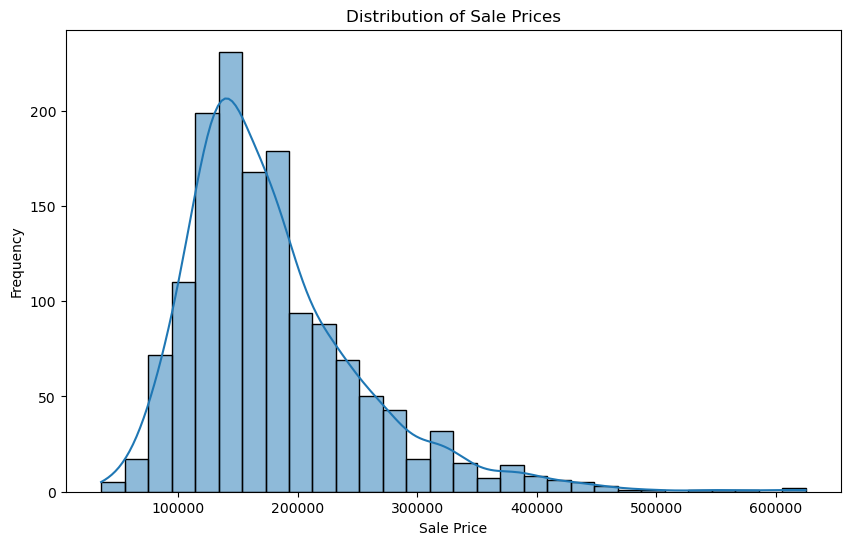

In [149]:
# Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

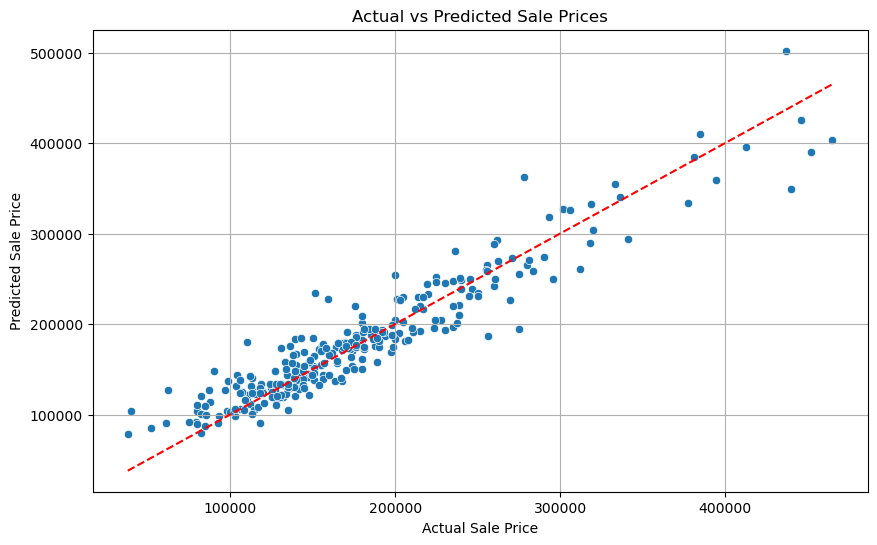

In [155]:
# Create a DataFrame to store the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()], 
         color='red', linestyle='--')  # Diagonal line for reference
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()

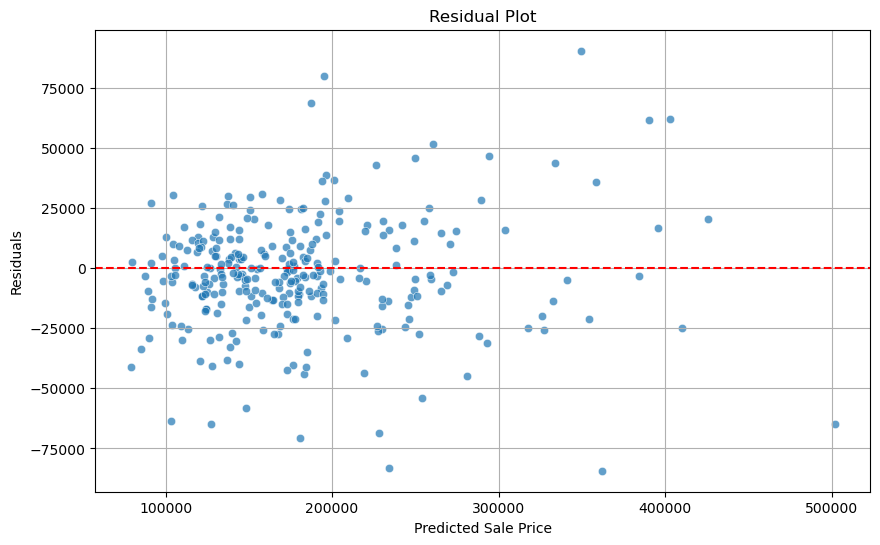

In [163]:
# Create a DataFrame to store the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate residuals
results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=results_df, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

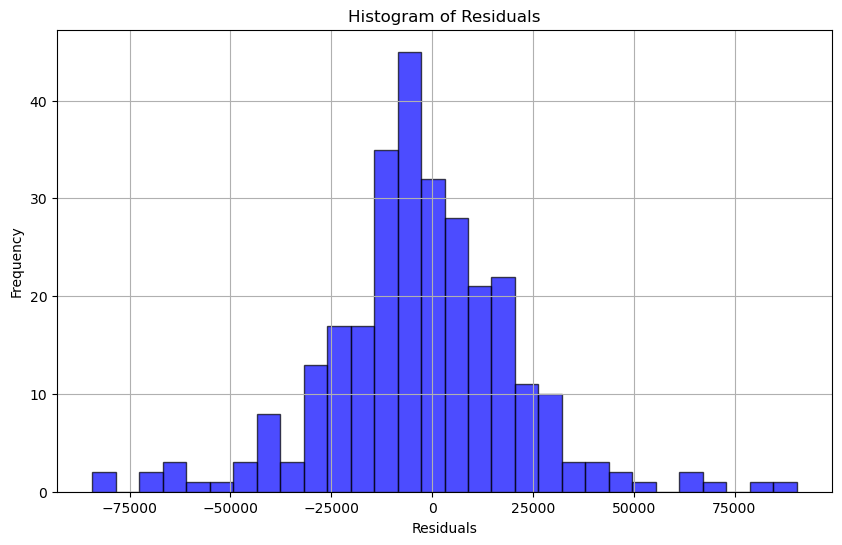

In [167]:
# Plotting the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(results_df['Residuals'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()